In [1]:
import sys
import os
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))
from datasets.Waymo import WaymoDataset, waymo_collate_fn, create_idx
from model.layers.Spline import NaturalCubicSpline

In [2]:
tfrecord_path = '../../data1/waymo_dataset/uncompressed/tf_example/validation'
idx_path = '../../idx/validation'
dataset = WaymoDataset(tfrecord_path, idx_path)
dataloader = DataLoader(dataset, batch_size=1, collate_fn=lambda x: waymo_collate_fn(x))
road_map, agent_trajectories, unobserved_positions, future_times, target_velocity, target_occupancy_grid = next(iter(dataloader))

[[ 461.26816 -293.08084]
 [ 460.42993 -292.70602]
 [ 459.57407 -292.2938 ]
 [ 458.7034  -291.88794]
 [ 457.85068 -291.48822]
 [ 456.9982  -291.09454]
 [ 456.14697 -290.6921 ]
 [ 455.295   -290.3002 ]
 [ 454.45135 -289.91498]
 [ 453.5773  -289.51135]
 [ 452.7273  -289.1185 ]]
[[ -4.74518534 -34.66081611]
 [ -4.73688635 -33.74264282]
 [ -4.70134983 -32.79333905]
 [ -4.67757866 -31.83302037]
 [ -4.652253   -30.89160167]
 [ -4.63236789 -29.95282333]
 [ -4.6039548  -29.01168894]
 [ -4.58548451 -28.074094  ]
 [ -4.56982001 -27.14678   ]
 [ -4.54944546 -26.18424754]
 [ -4.52932695 -25.24806437]]


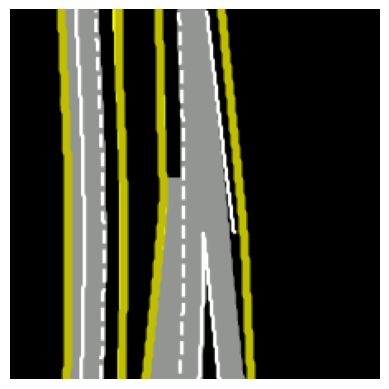

In [3]:
image_buffer = road_map[0].numpy() / 255.0
plt.imshow(image_buffer)
plt.axis('off')
plt.show()

tensor([[ -4.7452, -34.6608],
        [ -4.7369, -33.7426],
        [ -4.7013, -32.7933],
        [ -4.6776, -31.8330],
        [ -4.6523, -30.8916],
        [ -4.6324, -29.9528],
        [ -4.6040, -29.0117],
        [ -4.5855, -28.0741],
        [ -4.5698, -27.1468],
        [ -4.5494, -26.1842],
        [ -4.5293, -25.2481]])


/tmp/ipykernel_34659/2074659169.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


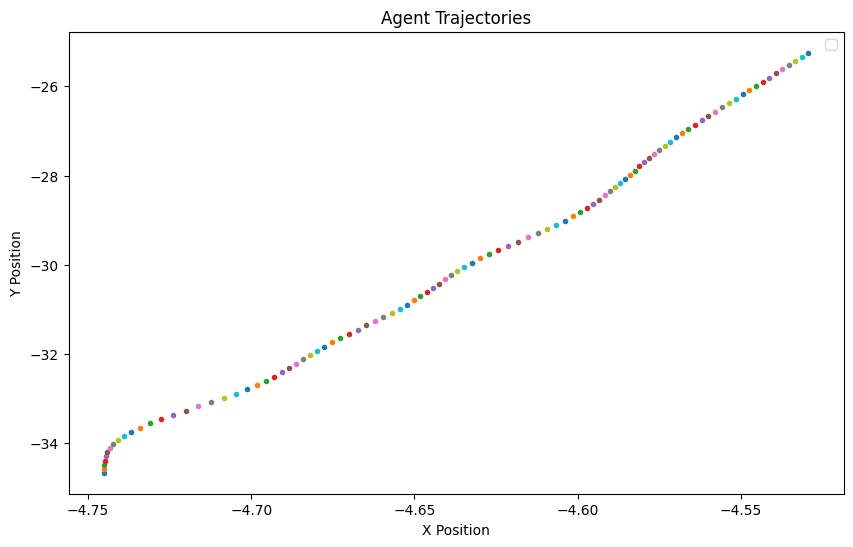

In [5]:
trajectories = agent_trajectories[0,0,:,:2]
#num_agents, seq_len, num_features = trajectories.shape
seq_len, num_features = trajectories.shape
print(trajectories)
t = torch.linspace(0., 1., seq_len).to(agent_trajectories)
spline = NaturalCubicSpline(t, trajectories)

plt.figure(figsize=(10, 6))

SAMPLING_FREQUENCY = 100
for i in range(SAMPLING_FREQUENCY+1):
    t = i / SAMPLING_FREQUENCY
    positions = spline.evaluate(t)
    plt.plot(positions[0].cpu().numpy(), positions[1].cpu().numpy(), 'o-', markersize=3)

plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Agent Trajectories')
plt.legend()
plt.show()